<a href="https://colab.research.google.com/github/priyanshiyadavnitsgr/Computer-Vision/blob/master/Fiding_missing_object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

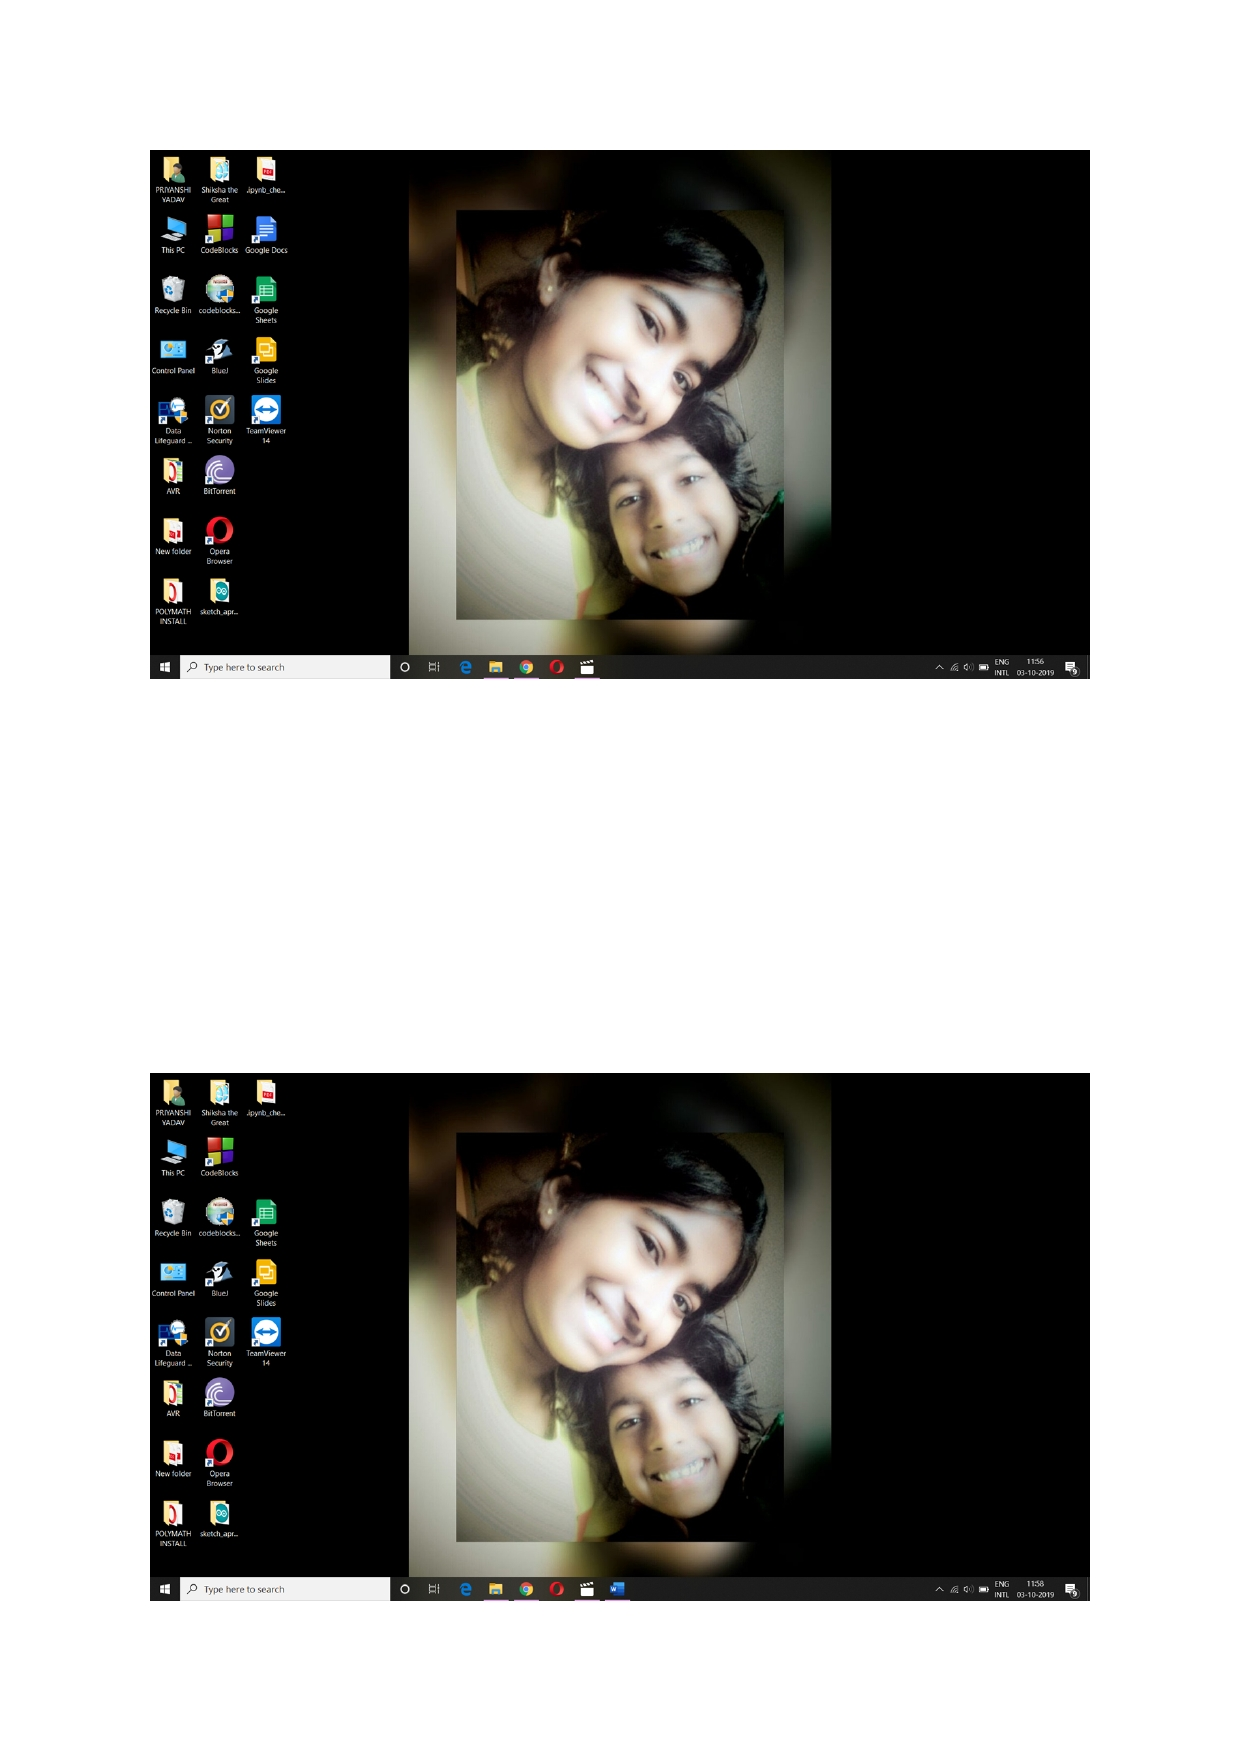

In [3]:
image=cv2.imread('/content/Desktop-page0001.jpg')
cv2_imshow(image)

In [4]:
image.shape

(1754, 1240, 3)

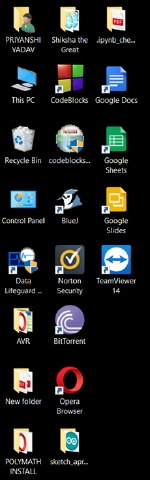

In [53]:
image1=image[150:630,150:300 ]
cv2_imshow(image1)

gray=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

print('\n')



In [0]:
def object_detection(image, template, width, height):
    image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
  
    result=cv2.matchTemplate(image_gray, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc= cv2.minMaxLoc(result)
    print('Accuracy: ', max_val, '\nLocation: ', max_loc)
    
    top_left=max_loc
    bottom_right=(top_left[0]+width, top_left[1]+height)
    detected=cv2.rectangle(image.copy(), top_left, bottom_right, (0,0,255), 4)

    cv2_imshow( detected)
   

Accuracy:  0.9472837448120117 
Location:  (0, 373)


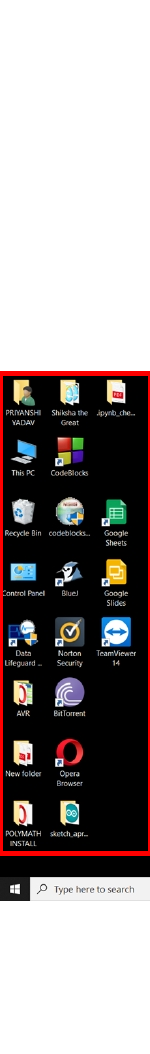

In [54]:
object_detection(image[700:, 150:300], gray, 150, 480)

In [0]:
def crop_detected_object (image, template, width, height):
    image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  

    result=cv2.matchTemplate(image_gray, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc= cv2.minMaxLoc(result)
    print(' Accuracy: ', max_val,'\n Location of the image: ',  max_loc)

    top_left=max_loc
    bottom_right=(top_left[0]+width, top_left[1]+height)

    cropped=image[ top_left[1]:top_left[1]+height, top_left[0]:top_left[0]+width]

    return cropped

 Accuracy:  0.9472837448120117 
 Location of the image:  (0, 373)


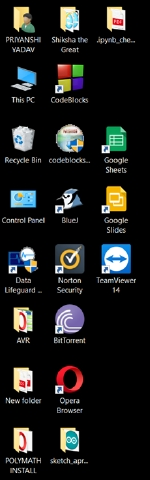

In [57]:
image2=crop_detected_object(image[700:, 150:300], gray, 150, 480)
cv2_imshow(image2)

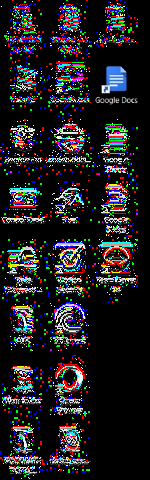

In [58]:
image3= image1-image2
cv2_imshow(image3)